<a href="https://colab.research.google.com/github/kristoowae/Portofolio-Google_Notebook/blob/main/UjiHipotesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [1]:
import numpy as np #library untuk matematika
import pandas as pd #library untuk dataframe
import seaborn as sns #library untuk visualisasi
import matplotlib.pyplot as plt

# One sample T-test

Digunakan untuk membandingkan hasil dari eksperimen yang tidak memiliki benchmark sebelumnya

# Contoh Pengujian Hipotesis Satu Populasi

In [2]:
# https://docs.google.com/spreadsheets/d/1x3abnbEGqMqYlPoDqss5Puxkx0B9owImUENxGGtXdm4/edit?gid=235186554#gid=235186554
google_sheets_link = 'https://docs.google.com/spreadsheets/d/1x3abnbEGqMqYlPoDqss5Puxkx0B9owImUENxGGtXdm4/export?format=csv'
df = pd.read_csv(google_sheets_link, sep=',')

## Menghitung secara manual

In [3]:
nilai = [74, 49, 68, 86, 80, 71, 77, 81, 72, 77]
np.mean(nilai)

np.float64(73.5)

In [4]:
x_bar = np.mean(nilai)
mu = 80
s = np.std(nilai, ddof = 1)
n = len(nilai)

t_stat = (x_bar - mu) / (s / np.sqrt(n))

print(t_stat)

-2.0346749160869684


In [5]:
from scipy.stats import t
t.ppf(0.05, n - 1)

np.float64(-1.8331129326536337)

## Menggunakan function Python

In [6]:
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(nilai, 80)
t_stat

np.float64(-2.0346749160869684)

In [9]:
import numpy as np
from scipy import stats
import pandas as pd # Meskipun tidak langsung dipakai di contoh ini, sering ada di Colab

# --- Konsep p-value ---

# Tingkat Signifikansi (Alpha - ambang batas kesepakatan peneliti)
alpha_1_persen = 0.01 # 1%
alpha_5_persen = 0.05 # 5% (paling umum)
alpha_10_persen = 0.10 # 10%

print(f"Tingkat signifikansi (alpha) yang umum digunakan:")
print(f"- 1% (alpha = {alpha_1_persen})")
print(f"- 5% (alpha = {alpha_5_persen})")
print(f"- 10% (alpha = {alpha_10_persen})")
print("-" * 30)

# --- Contoh Skenario: Uji Hipotesis (One-sample t-test) ---
# Misalkan kita ingin menguji apakah rata-rata nilai suatu kelompok
# secara signifikan kurang dari 80.

# Hipotesis Nol (H0): Rata-rata nilai = 80
# Hipotesis Alternatif (Ha): Rata-rata nilai < 80 (uji satu-sisi, 'less')

# Data sampel (acak untuk demonstrasi)
# Anggap ini adalah nilai ujian dari 30 siswa
np.random.seed(42) # Untuk hasil yang dapat direproduksi
nilai_ujian_sampel = np.random.normal(loc=78, scale=5, size=30) # Rata-rata sekitar 78

print(f"Data sampel nilai ujian (30 siswa):\n{np.round(nilai_ujian_sampel, 2)}")
print(f"Rata-rata sampel: {np.mean(nilai_ujian_sampel):.2f}")
print("-" * 30)

# Lakukan One-sample t-test
# stats.ttest_1samp(data_sampel, nilai_yang_diuji, alternative='less')
# 'less' berarti Ha: rata-rata < nilai_yang_diuji
t_statistic, p_value = stats.ttest_1samp(nilai_ujian_sampel, popmean=80, alternative='less')

print(f"Hasil Uji T-test Satu Sampel (H0: Rata-rata = 80 vs. Ha: Rata-rata < 80):")
print(f"Statistik T: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print("-" * 30)

# --- Interpretasi P-value ---

print("\n--- Interpretasi P-value terhadap Tingkat Signifikansi ---")

# Tingkat signifikansi yang kita pilih (misal, alpha = 0.05)
alpha_chosen = alpha_5_persen

print(f"Tingkat Signifikansi (alpha) yang dipilih: {alpha_chosen * 100:.0f}%")

if p_value < alpha_chosen:
    print(f"Karena P-value ({p_value:.4f}) < Alpha ({alpha_chosen:.4f}), kita MENOLAK Hipotesis Nol (H0).")
    print(f"Ada bukti statistik yang signifikan untuk menyatakan bahwa rata-rata nilai kurang dari 80.")
else:
    print(f"Karena P-value ({p_value:.4f}) >= Alpha ({alpha_chosen:.4f}), kita GAGAL MENOLAK Hipotesis Nol (H0).")
    print(f"Tidak ada bukti statistik yang signifikan untuk menyatakan bahwa rata-rata nilai kurang dari 80.")

print("-" * 30)

# --- Ilustrasi Peluang Kesalahan (Type I Error) ---
# Konsep "100 test -> hanya ada x% tes yang tidak memenuhi H0"
# Ini lebih ke simulasi Monte Carlo, tapi bisa dijelaskan secara konseptual.

# Misalkan kita melakukan banyak uji (misal 1000 kali)
# di mana H0 sebenarnya BENAR (rata-rata populasi memang 80).
# Berapa kali kita akan MENOLAK H0 secara keliru?
# Tingkat alpha adalah batas atas untuk peluang ini.

print("\n--- Konsep Peluang Kesalahan Tipe I (False Positive) ---")
print(f"Jika kita menetapkan tingkat signifikansi (alpha) sebesar {alpha_chosen * 100:.0f}%,")
print(f"ini berarti ada {alpha_chosen * 100:.0f}% kemungkinan kita akan MENOLAK Hipotesis Nol (H0)")
print(f"padahal sebenarnya Hipotesis Nol tersebut BENAR (kita membuat keputusan yang salah).")
print(f"Dalam 100 pengujian, secara rata-rata ada {alpha_chosen * 100:.0f} pengujian di mana kita keliru menolak H0.")

Tingkat signifikansi (alpha) yang umum digunakan:
- 1% (alpha = 0.01)
- 5% (alpha = 0.05)
- 10% (alpha = 0.1)
------------------------------
Data sampel nilai ujian (30 siswa):
[80.48 77.31 81.24 85.62 76.83 76.83 85.9  81.84 75.65 80.71 75.68 75.67
 79.21 68.43 69.38 75.19 72.94 79.57 73.46 70.94 85.33 76.87 78.34 70.88
 75.28 78.55 72.25 79.88 75.   76.54]
Rata-rata sampel: 77.06
------------------------------
Hasil Uji T-test Satu Sampel (H0: Rata-rata = 80 vs. Ha: Rata-rata < 80):
Statistik T: -3.5793
P-value: 0.0006
------------------------------

--- Interpretasi P-value terhadap Tingkat Signifikansi ---
Tingkat Signifikansi (alpha) yang dipilih: 5%
Karena P-value (0.0006) < Alpha (0.0500), kita MENOLAK Hipotesis Nol (H0).
Ada bukti statistik yang signifikan untuk menyatakan bahwa rata-rata nilai kurang dari 80.
------------------------------

--- Konsep Peluang Kesalahan Tipe I (False Positive) ---
Jika kita menetapkan tingkat signifikansi (alpha) sebesar 5%,
ini berarti ada 5% 

# Contoh Implementasi

In [11]:
variant_revenue = df.loc[df["VARIANT_NAME"] == "variant", "REVENUE"]
variant_revenue.describe()

,REVENUE
count,5016.000000
mean,0.070070
std,1.314802
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,58.630000


<Axes: >

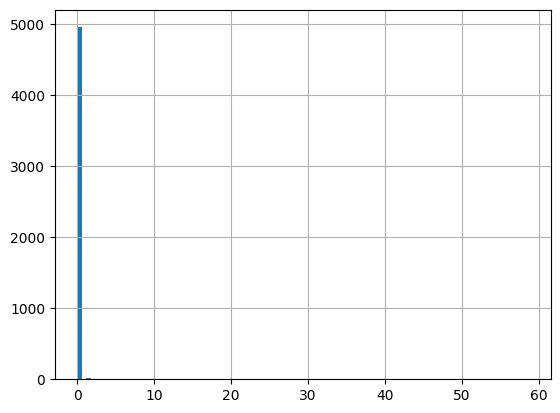

In [12]:
variant_revenue.hist(bins = 100)

In [13]:
ttest_1samp(variant_revenue, 0)

TtestResult(statistic=np.float64(3.774410929668571), pvalue=np.float64(0.00016223887213175306), df=np.int64(5015))

## Contoh Pengujian Hipotesis Dua Populasi

In [15]:
from scipy.stats import norm
norm.rvs(loc = 70, scale = 10, size = 10).round().astype("int")

array([64, 89, 70, 59, 78, 58, 72, 50, 57, 72])

In [16]:
kelas_1 = [74, 49, 68, 86, 80, 71, 77, 81, 72, 77]
kelas_2 = [78, 57, 65, 82, 73, 76, 54, 58]

In [17]:
x_bar1 = np.mean(kelas_1)
s1 = np.std(kelas_1, ddof = 1)
n1 = len(kelas_1)

x_bar2 = np.mean(kelas_2)
s2 = np.std(kelas_2, ddof = 1)
n2 = len(kelas_2)

In [18]:
print(f"Standard deviasi kelas 1: {s1}")
print(f"Standard deviasi kelas 2: {s2}")

Standard deviasi kelas 1: 10.102254973794492
Standard deviasi kelas 2: 10.76286605483343


In [19]:
df = n1 + n2 - 2
sp = np.sqrt(((n1 - 1) * np.power(s1, 2) + (n2 - 1) * np.power(s2, 2)) / df)

In [20]:
t_stat = (x_bar1 - x_bar2) / (sp * np.sqrt(1/n1 + 1/n2))
print(t_stat)

1.140634940065406


In [21]:
from scipy.stats import ttest_ind

In [22]:
t_stat, p_value =  ttest_ind(kelas_1, kelas_2, equal_var = True)

In [23]:
if p_value < 0.05:
  print("Nilai kelas 1 dan kelas 2 berbeda")
else:
  print("Nilai kelas 1 dan kelas 2 sama")

Nilai kelas 1 dan kelas 2 sama


In [24]:
p_value

np.float64(0.2708083866673808)

In [26]:
# Reload the dataframe before using it
google_sheets_link = 'https://docs.google.com/spreadsheets/d/1x3abnbEGqMqYlPoDqss5Puxkx0B9owImUENxGGtXdm4/export?format=csv'
df = pd.read_csv(google_sheets_link, sep=',')

# Now df is the DataFrame again, and .loc can be used
variant_revenue = df.loc[df["VARIANT_NAME"] == "variant", "REVENUE"]
control_revenue = df.loc[df["VARIANT_NAME"] == "control", "REVENUE"]

In [27]:
variant_revenue.describe()

,REVENUE
count,5016.000000
mean,0.070070
std,1.314802
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,58.630000


In [28]:
control_revenue.describe()

,REVENUE
count,4984.000000
mean,0.129013
std,3.007524
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,196.010000


<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

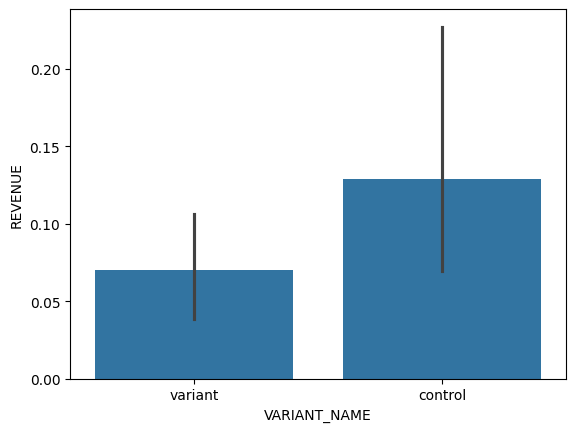

In [29]:
sns.barplot(data = df, y = "REVENUE", x = "VARIANT_NAME")

In [30]:
t_stat, p_value =  ttest_ind(control_revenue, variant_revenue, equal_var = False)
p_value

np.float64(0.20469713432410777)

In [31]:
df.groupby("VARIANT_NAME")["REVENUE"].apply(lambda x: sum(x > 0))

,REVENUE
VARIANT_NAME,
control,80
variant,72


## Contoh Pengujian Hipotesis Dua Populasi Berpasangan

In [32]:
sebelum = [59, 71, 64, 75, 75, 61, 52, 66, 71, 69]
sesudah = [98, 91, 86, 72, 77, 54, 69, 89, 66, 87]

In [33]:
beda = np.array(sesudah) - np.array(sebelum)
x_beda = np.mean(beda)
sd = np.std(beda, ddof = 1)
n = len(beda)
mu = 0

In [34]:
t_stat = (x_beda - mu) / (sd / np.sqrt(n))

In [35]:
t_stat

np.float64(2.6423876827871844)

In [36]:
from scipy.stats import ttest_rel

In [37]:
t_stat, p_value = ttest_rel(sesudah, sebelum)

In [38]:
if p_value < 0.05:
  print("Nilai sesudah berbeda daripada nilai sebelum")
else:
  print("Nilai sesudah sama dengan nilai sebelum")

Nilai sesudah berbeda daripada nilai sebelum


In [39]:
t_stat

np.float64(2.6423876827871844)

## Uji Beda Proporsi

In [40]:
perempuan_selamat = 233
total_perempuan = 314
laki_selamat = 109
total_laki = 577

In [41]:
proporsi_perempuan = perempuan_selamat / total_perempuan
proporsi_laki = laki_selamat / total_laki

prop_gabungan = (perempuan_selamat + laki_selamat) / (total_perempuan + total_laki)

In [42]:
t_stat = (proporsi_perempuan - proporsi_laki) / np.sqrt(prop_gabungan * (1 - prop_gabungan) * (1/ total_perempuan + 1/ total_laki))
print(t_stat)

16.218833930670097


In [43]:
from statsmodels.stats.proportion import proportions_ztest

In [44]:
proportions_ztest([perempuan_selamat, laki_selamat], [total_perempuan, total_laki])

(np.float64(16.218833930670097), np.float64(3.7117477701134797e-59))

In [45]:
proporsi_laki

0.18890814558058924

In [46]:
from statsmodels.stats.proportion import proportions_ztest

In [47]:
control_revneue_positive = df.loc[(df["VARIANT_NAME"] == "control") & (df["REVENUE"] > 0)]["USER_ID"].nunique()
variant_revneue_positive = df.loc[(df["VARIANT_NAME"] == "variant") & (df["REVENUE"] > 0)]["USER_ID"].nunique()

In [48]:
df.groupby("VARIANT_NAME")["USER_ID"].nunique()

,USER_ID
VARIANT_NAME,
control,3931
variant,3934


In [49]:
proportions_ztest([control_revneue_positive, variant_revneue_positive], [3931, 3934])

(np.float64(0.7442761379156507), np.float64(0.4567094342624727))

--- Data Simulasi A/B Test (5 Baris Pertama) ---
   user_id    group    revenue
0        1  control  13.973713
1        2  control   8.893886
2        3  control   0.000000
3        4  control   0.000000
4        5  control   8.126773

--- Statistik Ringkasan Per Grup ---
         count  mean  std
group                    
control   5000  2.54  5.7
variant   5000  3.24  6.9
--------------------------------------------------


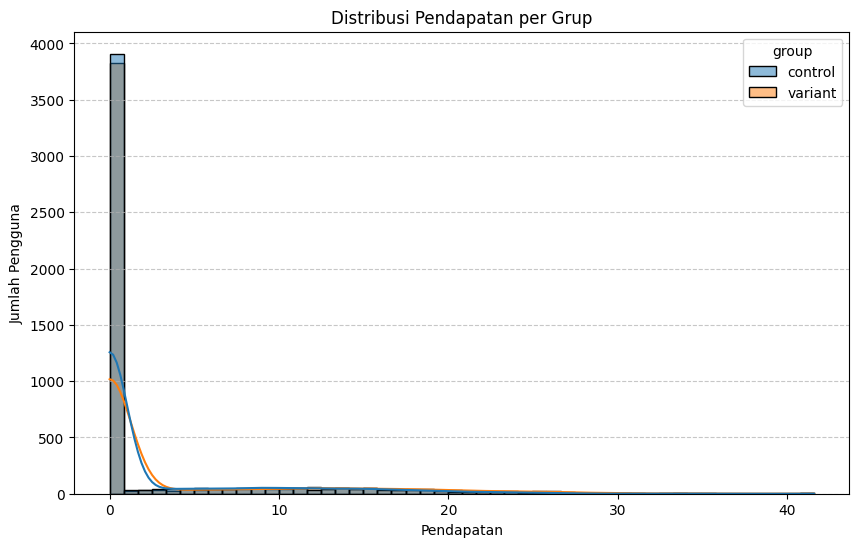


--- Analisis Metrik Pendapatan (Revenue) ---
Rata-rata Pendapatan Kontrol: 2.54
Rata-rata Pendapatan Varian: 3.24

Hipotesis Nol (H0): Rata-rata pendapatan Varian <= Rata-rata pendapatan Kontrol
Hipotesis Alternatif (Ha): Rata-rata pendapatan Varian > Rata-rata pendapatan Kontrol
Statistik T (Revenue): 5.6034
P-value (Revenue): 0.0000
Kesimpulan: P-value (0.0000) < Alpha (0.05), MENOLAK H0.
Ada bukti statistik yang signifikan bahwa UI Netflix baru menghasilkan pendapatan rata-rata yang lebih tinggi.
--------------------------------------------------

--- Analisis Metrik Konversi ---
Grup Kontrol: 1110 konversi dari 5000 pengguna (22.20%)
Grup Varian: 1193 konversi dari 5000 pengguna (23.86%)

Hipotesis Nol (H0): Proporsi konversi Varian <= Proporsi konversi Kontrol
Hipotesis Alternatif (Ha): Proporsi konversi Varian > Proporsi konversi Kontrol
Statistik Z (Konversi): 1.9714
P-value (Konversi): 0.0243
Kesimpulan: P-value (0.0243) < Alpha (0.05), MENOLAK H0.
Ada bukti statistik yang sig

In [52]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Simulasi Data A/B Test ---
# Membuat data simulasi yang lebih realistis
np.random.seed(42) # Untuk reproduktibilitas hasil

num_users_per_group = 5000

# Data Grup Kontrol (UI Lama)
control_users = np.arange(1, num_users_per_group + 1)
control_revenues = np.random.normal(loc=10, scale=8, size=num_users_per_group) # Rata-rata 10, std 8
control_revenues[control_revenues < 0] = 0 # Revenue tidak boleh negatif

# Simulate some users having 0 revenue (non-converters)
control_is_converter = np.random.rand(num_users_per_group) < 0.25 # 25% conversion rate
control_revenues[~control_is_converter] = 0 # Set revenue to 0 for non-converters

df_control = pd.DataFrame({
    'user_id': control_users,
    'group': 'control',
    'revenue': control_revenues
})

# Data Grup Varian (UI Baru) - sedikit lebih baik
variant_users = np.arange(num_users_per_group + 1, num_users_per_group * 2 + 1)
variant_revenues = np.random.normal(loc=12, scale=9, size=num_users_per_group) # Rata-rata 12, std 9
variant_revenues[variant_revenues < 0] = 0 # Revenue tidak boleh negatif

# Simulate slightly higher conversion rate for variant
variant_is_converter = np.random.rand(num_users_per_group) < 0.28 # 28% conversion rate
variant_revenues[~variant_is_converter] = 0 # Set revenue to 0 for non-converters

df_variant = pd.DataFrame({
    'user_id': variant_users,
    'group': 'variant',
    'revenue': variant_revenues
})

# Gabungkan kedua DataFrame
df_ab_test = pd.concat([df_control, df_variant], ignore_index=True)

print("--- Data Simulasi A/B Test (5 Baris Pertama) ---")
print(df_ab_test.head())
print("\n--- Statistik Ringkasan Per Grup ---")
print(df_ab_test.groupby('group')['revenue'].agg(['count', 'mean', 'std']).round(2))
print("-" * 50)

# Visualisasi distribusi pendapatan
plt.figure(figsize=(10, 6))
sns.histplot(df_ab_test, x='revenue', hue='group', kde=True, bins=50)
plt.title('Distribusi Pendapatan per Grup')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Pengguna')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- 2. Analisis Metrik Pendapatan (Revenue) - Uji-t Independen ---
# Hipotesis Alternatif: revenue_variant > revenue_control (uji satu-sisi)
# Tingkat Signifikansi (Alpha)
alpha = 0.05

control_revenue = df_ab_test[df_ab_test['group'] == 'control']['revenue']
variant_revenue = df_ab_test[df_ab_test['group'] == 'variant']['revenue']

print("\n--- Analisis Metrik Pendapatan (Revenue) ---")
print(f"Rata-rata Pendapatan Kontrol: {control_revenue.mean():.2f}")
print(f"Rata-rata Pendapatan Varian: {variant_revenue.mean():.2f}")

# Lakukan Uji-t Independen
# asumsi: variansi tidak harus sama (equal_var=False, Welch's t-test)
# 'greater' karena Ha: mean_variant > mean_control
t_stat_revenue, p_value_revenue = stats.ttest_ind(
    variant_revenue, control_revenue, equal_var=False, alternative='greater'
)

print(f"\nHipotesis Nol (H0): Rata-rata pendapatan Varian <= Rata-rata pendapatan Kontrol")
print(f"Hipotesis Alternatif (Ha): Rata-rata pendapatan Varian > Rata-rata pendapatan Kontrol")
print(f"Statistik T (Revenue): {t_stat_revenue:.4f}")
print(f"P-value (Revenue): {p_value_revenue:.4f}")

if p_value_revenue < alpha:
    print(f"Kesimpulan: P-value ({p_value_revenue:.4f}) < Alpha ({alpha}), MENOLAK H0.")
    print("Ada bukti statistik yang signifikan bahwa UI Netflix baru menghasilkan pendapatan rata-rata yang lebih tinggi.")
else:
    print(f"Kesimpulan: P-value ({p_value_revenue:.4f}) >= Alpha ({alpha}), GAGAL MENOLAK H0.")
    print("Tidak ada bukti statistik yang signifikan bahwa UI Netflix baru menghasilkan pendapatan rata-rata yang lebih tinggi.")
print("-" * 50)

# --- 3. Analisis Metrik Konversi (Proportion Test) ---
# Konversi = pengguna dengan revenue > 0
# Hipotesis Alternatif: proporsi_variant > proporsi_control (uji satu-sisi)

# Hitung jumlah konversi dan total pengguna per grup
conversions_control = (control_revenue > 0).sum()
total_users_control = len(control_revenue)

conversions_variant = (variant_revenue > 0).sum()
total_users_variant = len(variant_revenue)

print("\n--- Analisis Metrik Konversi ---")
print(f"Grup Kontrol: {conversions_control} konversi dari {total_users_control} pengguna ({conversions_control/total_users_control:.2%})")
print(f"Grup Varian: {conversions_variant} konversi dari {total_users_variant} pengguna ({conversions_variant/total_users_variant:.2%})")

# Lakukan Uji-Z Proporsi
# counts = [jumlah_konversi_varian, jumlah_konversi_kontrol]
# nobs = [total_pengguna_varian, total_pengguna_kontrol]
# alternative='larger' karena Ha: proporsi_variant > proporsi_control
stat_prop, p_value_prop = proportions_ztest(
    [conversions_variant, conversions_control], # Pass counts as the first positional argument
    [total_users_variant, total_users_control], # Pass nobs as the second positional argument
    alternative='larger'
)

print(f"\nHipotesis Nol (H0): Proporsi konversi Varian <= Proporsi konversi Kontrol")
print(f"Hipotesis Alternatif (Ha): Proporsi konversi Varian > Proporsi konversi Kontrol")
print(f"Statistik Z (Konversi): {stat_prop:.4f}")
print(f"P-value (Konversi): {p_value_prop:.4f}")

if p_value_prop < alpha:
    print(f"Kesimpulan: P-value ({p_value_prop:.4f}) < Alpha ({alpha}), MENOLAK H0.")
    print("Ada bukti statistik yang signifikan bahwa UI Netflix baru menghasilkan tingkat konversi yang lebih tinggi.")
else:
    print(f"Kesimpulan: P-value ({p_value_prop:.4f}) >= Alpha ({alpha}), GAGAL MENOLAK H0.")
    print("Tidak ada bukti statistik yang signifikan bahwa UI Netflix baru menghasilkan tingkat konversi yang lebih tinggi.")
print("-" * 50)

In [62]:
df

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
9995,1981,control,0.0
9996,502,variant,0.0
9997,9214,variant,0.0
9998,7741,control,0.0


In [53]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

--- 5 Baris Pertama Dataset Titanic ---
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

--- Informasi Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
--- 

/tmp/ipython-input-55-2480299257.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=titanic, x='pclass', y='survived', errorbar=None, palette='viridis')


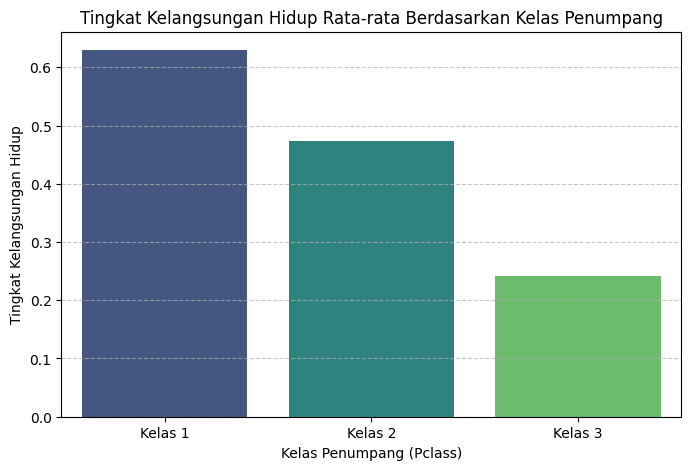


--- Melakukan Uji Chi-squared untuk Independensi ---
Tabel Kontingensi (Pclass vs. Survived):
 survived    0    1
pclass            
1          80  136
2          97   87
3         372  119

Statistik Chi-squared: 102.8890
P-value: 0.0000

Kesimpulan: Karena P-value (0.0000) < Alpha (0.05), MENOLAK H0.
Ada bukti statistik yang signifikan bahwa ada hubungan (asosiasi) antara kelas penumpang dan kelangsungan hidup.
Dengan kata lain, tingkat kelangsungan hidup TIDAK independen dari kelas penumpang.
--------------------------------------------------


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest # Untuk perbandingan 2 proporsi, jika dibutuhkan
from scipy.stats import chi2_contingency # Untuk perbandingan >2 proporsi (atau asosiasi antar kategori)

# --- 1. Memuat Dataset Titanic ---
# Memuat dataset Titanic yang tersedia di Seaborn
titanic = sns.load_dataset("titanic")

print("--- 5 Baris Pertama Dataset Titanic ---")
print(titanic.head())
print("\n--- Informasi Dataset ---")
titanic.info()
print("-" * 50)

# --- 2. Memilih Metrik ---
# Metrik utama yang ingin kita analisis adalah tingkat kelangsungan hidup (Survived).
# Kita ingin melihat bagaimana metrik ini bervariasi berdasarkan 'pclass' (kelas penumpang).

# Kolom 'survived' adalah 0 (tidak selamat) dan 1 (selamat)
# Kolom 'pclass' adalah 1, 2, 3 (kelas pertama, kedua, ketiga)

# --- 3. Membangun Hipotesis ---
# Kita ingin menguji apakah ada hubungan (asosiasi) antara 'pclass' dan 'survived'.

# Hipotesis Nol (H0): Tidak ada hubungan yang signifikan (independen) antara kelas penumpang (pclass) dan kelangsungan hidup (survived).
# Hipotesis Alternatif (Ha): Ada hubungan yang signifikan (tidak independen) antara kelas penumpang (pclass) dan kelangsungan hidup (survived).

# Tingkat Signifikansi (Alpha) yang umum digunakan
alpha = 0.05 # 5%

# --- 4. Memilih Uji Statistik yang Sesuai ---
# Karena kita membandingkan dua variabel kategorikal ('pclass' dan 'survived'),
# dan kita ingin mengetahui apakah ada asosiasi di antara keduanya,
# Uji Chi-squared untuk Independensi (Chi-squared Test for Independence) adalah uji yang paling tepat.

print("\n--- Statistik Ringkasan: Tingkat Kelangsungan Hidup per Kelas Penumpang ---")
survival_by_pclass = titanic.groupby('pclass')['survived'].value_counts(normalize=True).unstack()
print(survival_by_pclass.round(4) * 100) # Tampilkan dalam persentase
print("-" * 50)

# --- Visualisasi untuk Insight Awal ---
plt.figure(figsize=(8, 5))
sns.barplot(data=titanic, x='pclass', y='survived', errorbar=None, palette='viridis')
plt.title('Tingkat Kelangsungan Hidup Rata-rata Berdasarkan Kelas Penumpang')
plt.xlabel('Kelas Penumpang (Pclass)')
plt.ylabel('Tingkat Kelangsungan Hidup')
plt.xticks([0, 1, 2], ['Kelas 1', 'Kelas 2', 'Kelas 3'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print("\n--- Melakukan Uji Chi-squared untuk Independensi ---")

# Buat tabel kontingensi (contingency table) dari 'pclass' dan 'survived'
contingency_table = pd.crosstab(titanic['pclass'], titanic['survived'])
print("Tabel Kontingensi (Pclass vs. Survived):\n", contingency_table)

# Lakukan Uji Chi-squared
# chi2: statistik chi-squared
# p: p-value
# dof: degrees of freedom
# expected: tabel frekuensi yang diharapkan jika H0 benar
chi2_stat, p_value_chi2, dof, expected_freq = chi2_contingency(contingency_table)

print(f"\nStatistik Chi-squared: {chi2_stat:.4f}")
print(f"P-value: {p_value_chi2:.4f}")

# --- Interpretasi Hasil ---
if p_value_chi2 < alpha:
    print(f"\nKesimpulan: Karena P-value ({p_value_chi2:.4f}) < Alpha ({alpha}), MENOLAK H0.")
    print("Ada bukti statistik yang signifikan bahwa ada hubungan (asosiasi) antara kelas penumpang dan kelangsungan hidup.")
    print("Dengan kata lain, tingkat kelangsungan hidup TIDAK independen dari kelas penumpang.")
else:
    print(f"\nKesimpulan: Karena P-value ({p_value_chi2:.4f}) >= Alpha ({alpha}), GAGAL MENOLAK H0.")
    print("Tidak ada bukti statistik yang signifikan untuk menyatakan bahwa ada hubungan antara kelas penumpang dan kelangsungan hidup.")
    print("Dengan kata lain, tingkat kelangsungan hidup mungkin independen dari kelas penumpang.")

print("-" * 50)

In [56]:
sns.load_dataset("titanic")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
